In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy, os
from scipy.stats import norm


from palettable.cmocean.sequential import Ice_20# Oslo_20
palettable_cmap = Ice_20 #Ice_20
pal_cmap = palettable_cmap.mpl_colormap


In [2]:
def lin(x,a,b):
	return a*x+b

In [3]:
import random
from operator import add, sub, mul

ops = (add, sub)
op = random.choice(ops)

print(op(1,1))

2


In [4]:
plt.rcParams.update({'lines.linewidth': 2,'lines.markersize': 12,}) #1.5 default?
plt.rcParams.update({'font.size': 14})

In [5]:
x_ax = np.linspace(0,10,20)
y = lin(x_ax,0.7,0)

# for i in range(len(x_ax)):
# 	y[i] = y[i] * np.random.uniform(0.6,1) #+ np.random.uniform(0,0.8)

for i in range(len(x_ax)):
	op = random.choice(ops)
	y[i] = op(y[i], np.random.uniform(0.1,0.4)) * np.random.uniform(0.6,1)

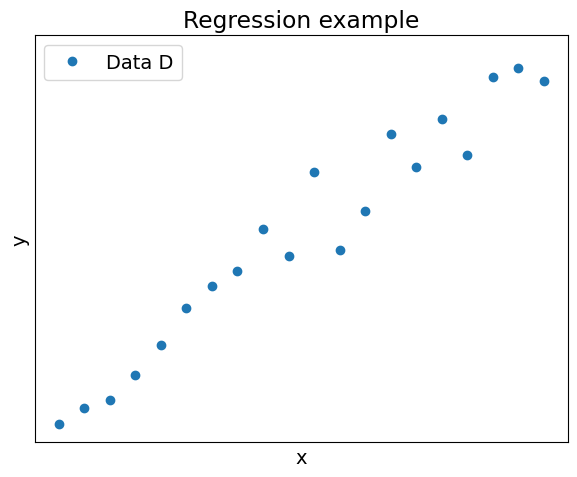

In [14]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D')
# ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Fit')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_unfitted.svg')


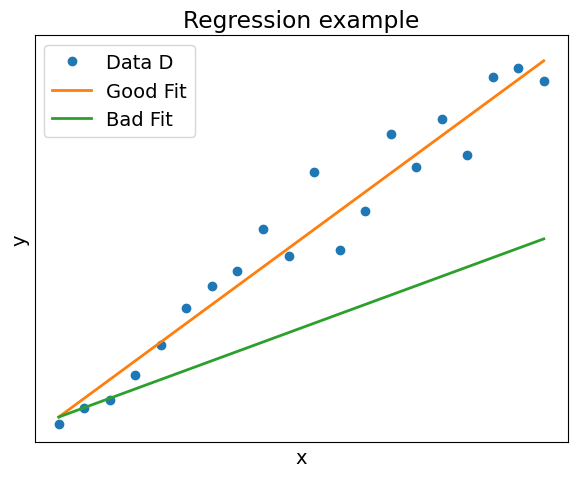

In [15]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(x_ax,y, ls='none', marker = '.', label = 'Data D')
ax.plot(x_ax,lin(x_ax,0.7,0)*0.8, label = 'Good Fit') #
ax.plot(x_ax,lin(x_ax,0.7,0)*0.4, label = 'Bad Fit') #
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.ylim((-0.4, 6))

plt.xticks([])
plt.yticks([])
plt.title('Regression example')
plt.tight_layout()
plt.savefig('Figures/Regression_fitted.svg')
